In [889]:
import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
from skimage import data, filters, color, morphology
from skimage.segmentation import flood, flood_fill
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from scipy import ndimage as ndi

from skimage.feature import peak_local_max

In [890]:
image = cv2.imread("car_ (1).jpg")
image = cv2.pyrMeanShiftFiltering(image, 14, 18)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (15, 5), 0)
thresh = cv2.threshold(gray, 140, 255, 0)[1]
thresh = cv2.erode(thresh,None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
# find contours in thresholded image, then grab the largest
# # one
cnts1 = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts1 = imutils.grab_contours(cnts1)
c1 = max(cnts1, key=cv2.contourArea)


In [891]:
area = []

for k in range(len(cnts1)):
    area.append(cv2.contourArea(cnts1[k]))
max_idx = np.argmax(np.array(area))

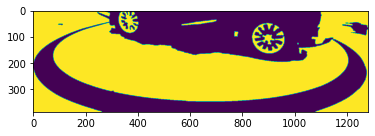

In [892]:
plt.imshow(thresh)

# Water Shed

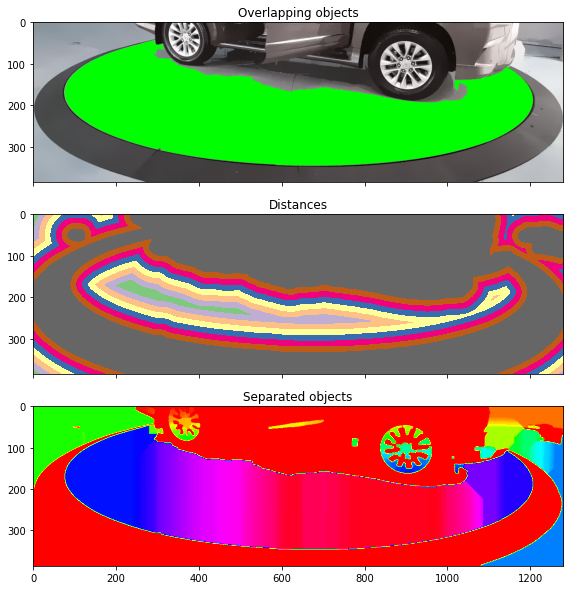

In [897]:
distance = ndi.distance_transform_edt(thresh)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=thresh)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=thresh)

fig, axes = plt.subplots(nrows=3, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.Accent)
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.hsv)
ax[2].set_title('Separated objects')
plt.imsave('label.jpg',labels)

In [893]:
extLeft1 = tuple(c1[c1[:, :, 0].argmin()][0])
extRight1 = tuple(c1[c1[:, :, 0].argmax()][0])
extTop1 = tuple(c1[c1[:, :, 1].argmin()][0])
extBot1 = tuple(c1[c1[:, :, 1].argmax()][0])
points = [extLeft1, 
extRight1, 
extTop1, 
extBot1, 
 ]

In [894]:
cv2.drawContours(image, cnts1, max_idx, (0,255, 0), -1)
# cv2.circle(image, extLeft1, 18, (255), -1)
# cv2.circle(image, extRight1, 18, (255), -1)
# cv2.circle(image, extTop1, 18, (255), -1)
# cv2.circle(image, extBot1, 18, (255), -1)

array([[[137, 148, 155],
        [137, 148, 155],
        [137, 148, 155],
        ...,
        [161, 159, 165],
        [161, 159, 165],
        [161, 159, 165]],

       [[137, 148, 155],
        [137, 148, 155],
        [137, 148, 155],
        ...,
        [161, 159, 165],
        [161, 159, 165],
        [161, 159, 165]],

       [[137, 148, 155],
        [137, 148, 155],
        [137, 148, 155],
        ...,
        [161, 159, 165],
        [161, 159, 165],
        [161, 159, 165]],

       ...,

       [[158, 169, 177],
        [158, 169, 177],
        [158, 169, 177],
        ...,
        [192, 195, 198],
        [192, 195, 198],
        [192, 195, 198]],

       [[158, 169, 177],
        [158, 169, 177],
        [158, 169, 177],
        ...,
        [192, 195, 198],
        [192, 195, 198],
        [192, 195, 198]],

       [[158, 169, 177],
        [158, 169, 177],
        [158, 169, 177],
        ...,
        [192, 195, 198],
        [192, 195, 198],
        [192, 195, 198]]

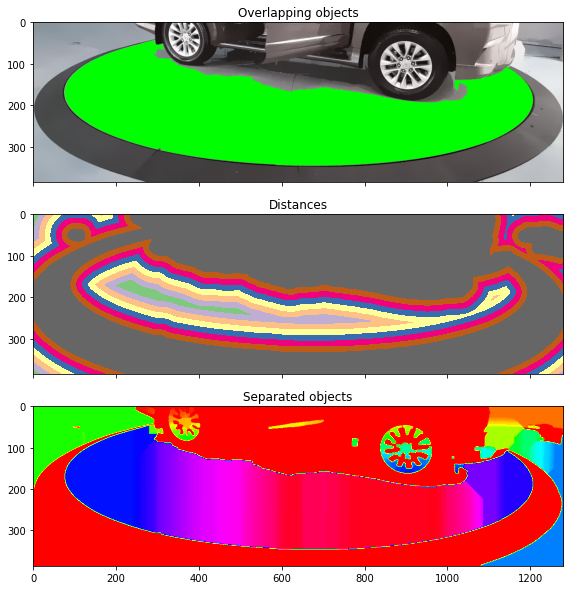

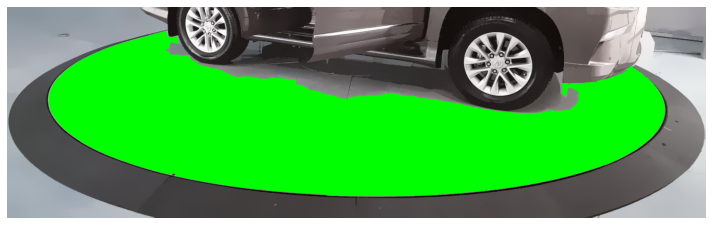

In [896]:
# image = cv2.bitwise_or(image,mask)
fig, ax = plt.subplots(nrows=1, figsize=(10, 20))

ax.imshow(image)
# ax.set_title('Original')
# ax.plot(x,y, 'bo')
ax.axis('off')

fig.tight_layout()
plt.show()